In [1]:
import tensorflow as tf
import numpy as np
from tf_powersfa import *

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
n_out = 3

In [3]:
batch_size = 1000
N = 1000

encoding_x = tf.placeholder("float", [N,3])

Wx  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_out]))
b0   = tf.Variable(tf.constant(0.1,shape=[n_out]))

dense0 = tf.matmul(encoding_x, Wx) + b0
dense = alt_power_whitening(dense0, 3, 50)[0]

In [4]:
n_hidden = 32

a, b, c = tf.split(dense, 3, axis=1)


In [5]:
x = tf.concat([b, c], axis=1)
y = a
range_bs = list(range(N))
permuted_bs = list(np.random.permutation(range_bs))
sd_indices =  tf.constant([permuted_bs])
sd_indices   = tf.transpose(sd_indices)
shape        = tf.constant([batch_size,1])
y_    = tf.scatter_nd(sd_indices, y, tf.shape(y))

h_join = tf.concat([y, x], axis=1)
h_marg = tf.concat([y_, x], axis=1)

Wx1  = tf.Variable(tf.random_normal(stddev=0.1,shape=[3, n_hidden]))
b1   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx2  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b2   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx3  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b3   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx4  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b4   = tf.Variable(tf.constant(0.1,shape=[n_hidden]))

Wx5  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b5   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx6  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, n_hidden]))
b6   = tf.Variable(tf.constant(0.1,shape=[1]))

Wx7  = tf.Variable(tf.random_normal(stddev=0.1,shape=[n_hidden, 1]))
b7   = tf.Variable(tf.constant(0.1,shape=[1]))

dense1_joint = tf.nn.leaky_relu(tf.matmul(h_join, Wx1) + b1)
dense2_joint = tf.nn.leaky_relu(tf.matmul(dense1_joint, Wx2) + b2)
dense3_joint = tf.nn.leaky_relu(tf.matmul(dense2_joint, Wx3) + b3)
dense4_joint = tf.nn.leaky_relu(tf.matmul(dense3_joint, Wx4) + b4)
dense5_joint = tf.nn.leaky_relu(tf.matmul(dense4_joint, Wx5) + b5)
dense6_joint = tf.nn.leaky_relu(tf.matmul(dense5_joint, Wx6) + b6)

dense7_joint = tf.matmul(dense6_joint, Wx7) + b7


dense1_marg = tf.nn.leaky_relu(tf.matmul(h_marg, Wx1) + b1)
dense2_marg = tf.nn.leaky_relu(tf.matmul(dense1_marg, Wx2) + b2)
dense3_marg = tf.nn.leaky_relu(tf.matmul(dense2_marg, Wx3) + b3)
dense4_marg = tf.nn.leaky_relu(tf.matmul(dense3_marg, Wx4) + b4)
dense5_marg = tf.nn.leaky_relu(tf.matmul(dense4_marg, Wx5) + b5)
dense6_marg = tf.nn.leaky_relu(tf.matmul(dense5_marg, Wx6) + b6)

dense7_marg = tf.matmul(dense6_marg, Wx7) + b7


loss1 = tf.reduce_mean(dense7_joint)-tf.log(tf.reduce_mean(tf.exp(dense7_marg)))


In [6]:
x2 = tf.concat([a, c], axis=1)
y2 = b
range_bs2 = list(range(N))
permuted_bs2 = list(np.random.permutation(range_bs2))
sd_indices2 =  tf.constant([permuted_bs2])
sd_indices2   = tf.transpose(sd_indices2)
y_2    = tf.scatter_nd(sd_indices2, y2, tf.shape(y2))

h_join2 = tf.concat([y2, x2], axis=1)
h_marg2 = tf.concat([y_2, x2], axis=1)



dense1_joint2 = tf.nn.leaky_relu(tf.matmul(h_join2, Wx1) + b1)
dense2_joint2 = tf.nn.leaky_relu(tf.matmul(dense1_joint2, Wx2) + b2)
dense3_joint2 = tf.nn.leaky_relu(tf.matmul(dense2_joint2, Wx3) + b3)
dense4_joint2 = tf.nn.leaky_relu(tf.matmul(dense3_joint2, Wx4) + b4)
dense5_joint2 = tf.nn.leaky_relu(tf.matmul(dense4_joint2, Wx5) + b5)
dense6_joint2 = tf.nn.leaky_relu(tf.matmul(dense5_joint2, Wx6) + b6)

dense7_joint2 = tf.matmul(dense6_joint2, Wx7) + b7


dense1_marg2 = tf.nn.leaky_relu(tf.matmul(h_marg2, Wx1) + b1)
dense2_marg2 = tf.nn.leaky_relu(tf.matmul(dense1_marg2, Wx2) + b2)
dense3_marg2 = tf.nn.leaky_relu(tf.matmul(dense2_marg2, Wx3) + b3)
dense4_marg2 = tf.nn.leaky_relu(tf.matmul(dense3_marg2, Wx4) + b4)
dense5_marg2 = tf.nn.leaky_relu(tf.matmul(dense4_marg2, Wx5) + b5)
dense6_marg2 = tf.nn.leaky_relu(tf.matmul(dense5_marg2, Wx6) + b6)

dense7_marg2 = tf.matmul(dense6_marg2, Wx7) + b7


loss2 = tf.reduce_mean(dense7_joint2)-tf.log(tf.reduce_mean(tf.exp(dense7_marg2)))


In [7]:
x3 = tf.concat([b, a], axis=1)
y3 = c
range_bs3 = list(range(N))
permuted_bs3 = list(np.random.permutation(range_bs3))
sd_indices3 =  tf.constant([permuted_bs3])
sd_indices3   = tf.transpose(sd_indices3)
y_3    = tf.scatter_nd(sd_indices3, y3, tf.shape(y3))

h_join3 = tf.concat([y3, x3], axis=1)
h_marg3 = tf.concat([y_3, x3], axis=1)



dense1_joint3 = tf.nn.leaky_relu(tf.matmul(h_join3, Wx1) + b1)
dense2_joint3 = tf.nn.leaky_relu(tf.matmul(dense1_joint3, Wx2) + b2)
dense3_joint3 = tf.nn.leaky_relu(tf.matmul(dense2_joint3, Wx3) + b3)
dense4_joint3 = tf.nn.leaky_relu(tf.matmul(dense3_joint3, Wx4) + b4)
dense5_joint3 = tf.nn.leaky_relu(tf.matmul(dense4_joint3, Wx5) + b5)
dense6_joint3 = tf.nn.leaky_relu(tf.matmul(dense5_joint3, Wx6) + b6)

dense7_joint3 = tf.matmul(dense6_joint3, Wx7) + b7


dense1_marg3 = tf.nn.leaky_relu(tf.matmul(h_marg3, Wx1) + b1)
dense2_marg3 = tf.nn.leaky_relu(tf.matmul(dense1_marg3, Wx2) + b2)
dense3_marg3 = tf.nn.leaky_relu(tf.matmul(dense2_marg3, Wx3) + b3)
dense4_marg3 = tf.nn.leaky_relu(tf.matmul(dense3_marg3, Wx4) + b4)
dense5_marg3 = tf.nn.leaky_relu(tf.matmul(dense4_marg3, Wx5) + b5)
dense6_marg3 = tf.nn.leaky_relu(tf.matmul(dense5_marg3, Wx6) + b6)

dense7_marg3 = tf.matmul(dense6_marg3, Wx7) + b7


loss3 = tf.reduce_mean(dense7_joint3)-tf.log(tf.reduce_mean(tf.exp(dense7_marg3)))


In [8]:
estimator_loss = -(loss1+loss2+loss3)

total_encoder_loss = loss1+loss2+loss3
encoder_lr = 0.005


train_encoders = tf.train.AdamOptimizer(encoder_lr).minimize(total_encoder_loss, var_list=[Wx, b0])
estimator_vars = [Wx1,  b1,  Wx2,  b2,  Wx3,  b3,  Wx4,  b4,  Wx5,  b5,  Wx6,  b6, Wx7, b7]

regularizer = tf.contrib.layers.l2_regularizer(scale=0.001)

for var in estimator_vars:
    tf.add_to_collection(tf.GraphKeys.REGULARIZATION_LOSSES, var)
reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
estimator_loss += reg_term
train_estimators =  tf.contrib.opt.NadamOptimizer(0.005).minimize(estimator_loss, var_list=estimator_vars) 

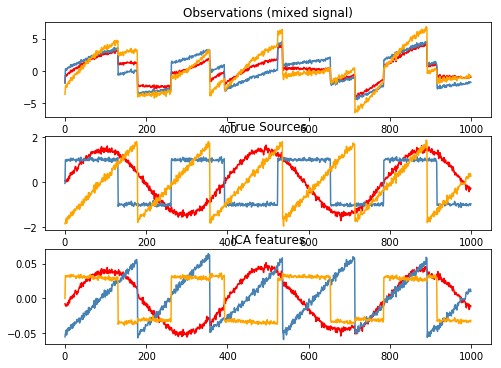

In [9]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from scipy import signal

time = np.linspace(0, 8, batch_size)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(1.4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.05 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1  , 1, 1],
              [0.5, 2, 1.0],
              [1.5, 1.0, 2.0]])  # Mixing matrixX = np.dot(S, A.T)  # Generate observations
X = np.dot(S, A.T)  # Generate observations

# Solve the task with FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals


models = [X, S, S_]
names = ['Observations (mixed signal)', 'True Sources', 'ICA features']
colors = ['red', 'steelblue', "orange"]
plt.figure(figsize=(8, 8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.show()

In [10]:
shuffled_x = np.array(X)


step: 0, loss1: 2.7e-05, loss2: -0.0094, loss3: -2.3e-05, all_loss: -0.0094


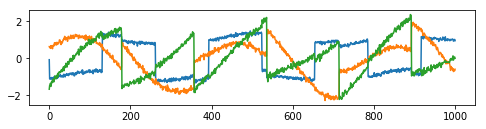

step: 100, loss1: 0.091, loss2: 0.038, loss3: 0.051, all_loss: 0.18
step: 200, loss1: 0.034, loss2: 0.028, loss3: 0.097, all_loss: 0.16
step: 300, loss1: 0.028, loss2: 0.028, loss3: -0.0043, all_loss: 0.052
step: 400, loss1: 0.033, loss2: 0.14, loss3: 0.14, all_loss: 0.32


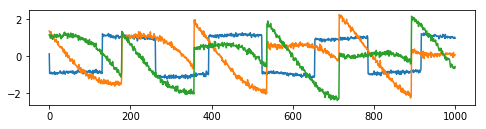

step: 500, loss1: 0.0049, loss2: 0.25, loss3: 0.23, all_loss: 0.49
step: 600, loss1: 0.13, loss2: 0.2, loss3: 0.11, all_loss: 0.44
step: 700, loss1: 0.0044, loss2: 0.0024, loss3: 0.0023, all_loss: 0.0091
step: 800, loss1: 0.019, loss2: 0.0095, loss3: 0.0026, all_loss: 0.031


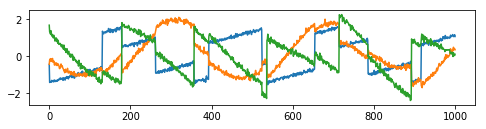

step: 900, loss1: 0.082, loss2: 0.044, loss3: 0.012, all_loss: 0.14
step: 1000, loss1: 0.31, loss2: 0.19, loss3: 0.18, all_loss: 0.68
step: 1100, loss1: 0.23, loss2: 0.25, loss3: 0.23, all_loss: 0.71
step: 1200, loss1: 0.51, loss2: 0.23, loss3: 0.46, all_loss: 1.2


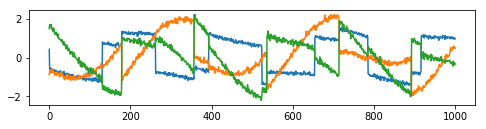

step: 1300, loss1: 0.16, loss2: 0.27, loss3: 0.34, all_loss: 0.77
step: 1400, loss1: 0.48, loss2: 0.43, loss3: 0.51, all_loss: 1.4
step: 1500, loss1: 0.25, loss2: 0.42, loss3: 0.53, all_loss: 1.2
step: 1600, loss1: 0.45, loss2: 0.36, loss3: 0.44, all_loss: 1.2


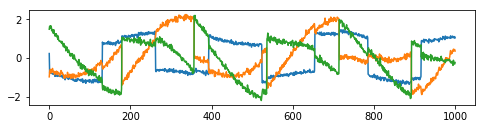

step: 1700, loss1: 0.44, loss2: 0.42, loss3: 0.4, all_loss: 1.3
step: 1800, loss1: 0.24, loss2: 0.36, loss3: 0.13, all_loss: 0.72
step: 1900, loss1: 0.32, loss2: 0.23, loss3: 0.26, all_loss: 0.82
step: 2000, loss1: 0.39, loss2: 0.3, loss3: 0.22, all_loss: 0.91


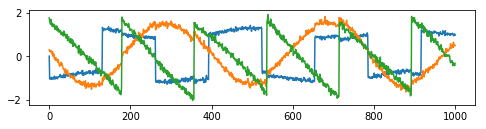

step: 2100, loss1: 0.16, loss2: 0.23, loss3: 0.29, all_loss: 0.69
step: 2200, loss1: 0.25, loss2: 0.44, loss3: 0.39, all_loss: 1.1
step: 2300, loss1: 0.28, loss2: 0.42, loss3: 0.54, all_loss: 1.2
step: 2400, loss1: 0.25, loss2: 0.58, loss3: 0.46, all_loss: 1.3


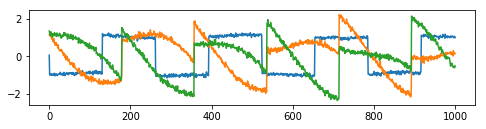

step: 2500, loss1: 0.15, loss2: 0.39, loss3: 0.34, all_loss: 0.88
step: 2600, loss1: 0.42, loss2: 0.55, loss3: 0.31, all_loss: 1.3
step: 2700, loss1: 0.14, loss2: -0.00099, loss3: 0.25, all_loss: 0.39
step: 2800, loss1: 0.2, loss2: 0.052, loss3: 0.12, all_loss: 0.37


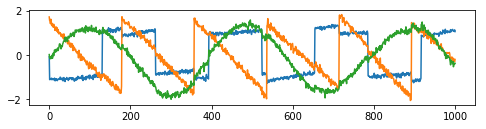

step: 2900, loss1: 0.26, loss2: 0.11, loss3: 0.1, all_loss: 0.47
step: 3000, loss1: -0.0041, loss2: 0.0019, loss3: 0.012, all_loss: 0.0098
step: 3100, loss1: 0.0094, loss2: 0.04, loss3: 0.044, all_loss: 0.094
step: 3200, loss1: 0.018, loss2: 0.11, loss3: 0.097, all_loss: 0.22


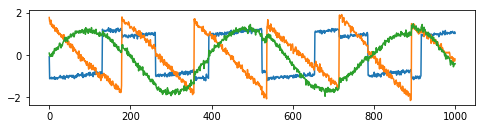

step: 3300, loss1: 0.035, loss2: 0.18, loss3: 0.17, all_loss: 0.39
step: 3400, loss1: 0.08, loss2: 0.25, loss3: 0.24, all_loss: 0.57
step: 3500, loss1: 0.11, loss2: 0.25, loss3: 0.25, all_loss: 0.61
step: 3600, loss1: 0.097, loss2: 0.28, loss3: 0.32, all_loss: 0.7


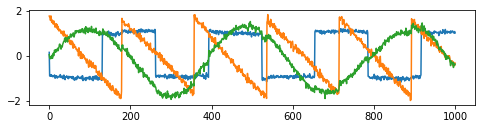

step: 3700, loss1: 0.14, loss2: 0.29, loss3: 0.35, all_loss: 0.78
step: 3800, loss1: 0.18, loss2: 0.27, loss3: 0.29, all_loss: 0.75
step: 3900, loss1: 0.27, loss2: 0.36, loss3: 0.35, all_loss: 0.98
step: 4000, loss1: 0.13, loss2: 0.21, loss3: 0.22, all_loss: 0.56


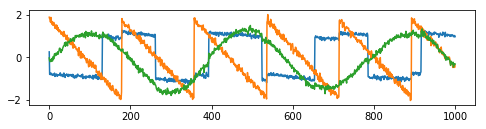

In [11]:
from random import shuffle
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(4001):
        np.random.shuffle(shuffled_x)
        current_loss1, current_loss2, current_loss3, _ = sess.run([loss1,
                                                    loss2, loss3, train_estimators], feed_dict={encoding_x:X})

        if i % 7   is 0: 
            _ = sess.run(train_encoders, feed_dict={encoding_x:X})

        if i % 100 is 0: 
            print("step: {}, loss1: {:.2}, loss2: {:.2}, loss3: {:.2}, all_loss: {:.2}".format(i,
                                current_loss1, current_loss2, current_loss3, current_loss1+current_loss2+current_loss3))
        if i % 400 is 0:
            plt.figure(figsize=(8, 8))
            plt.subplot(4, 1, 1)
            encoding = sess.run(dense, feed_dict={encoding_x:X})
            plt.plot(encoding)
            plt.show()